In [39]:
import pandas as pd


In [40]:
data = pd.read_csv('gold_futures(in).csv')
data.head()

Date         Open         High          Low        Close    Adj Close  \
0  1/2/2020  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000   
1  1/3/2020  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951   
2  1/6/2020  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951   
3  1/7/2020  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049   
4  1/8/2020  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024   

   Volume Price Movement  
0     214             Up  
1     107             Up  
2     416             Up  
3      47             Up  
4     236           Down

In [41]:
# Encode the target variable
data["Price Movement"] = data["Price Movement"].map({"Up": 1, "Down": 0})


# **RandomForestClassifier**

## **Model**

In [42]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Price Movement","Date","Adj Close"])
y = data["Price Movement"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)

accuracy = model_1.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.71


In [44]:
sampleOne_1 = X_test.iloc[0:1]
sampleOne_1

prediction = model_1.predict(sampleOne_1)[0]

prediction_result = "Up" if prediction == 1 else "Down"
print(f"Prediction for Sample One: {prediction_result}")


Prediction for Sample One: Down


In [45]:
sampleTwo_1 = X_test.iloc[10:11]
sampleTwo_1

prediction = model_1.predict(sampleTwo_1)[0]

prediction_result = "Up" if prediction == 1 else "Down"
print(f"Prediction for Sample Two: {prediction_result}")


Prediction for Sample Two: Up


## **Shap**

In [46]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model_1)


### **SampleOne_1**

In [47]:

shap_values_sampleOne = explainer.shap_values(sampleOne_1)
shap_values_sampleOne

array([[[ 0.0533291 , -0.0533291 ],
        [ 0.08924526, -0.08924526],
        [ 0.09534551, -0.09534551],
        [ 0.24124505, -0.24124505],
        [ 0.00440569, -0.00440569]]])

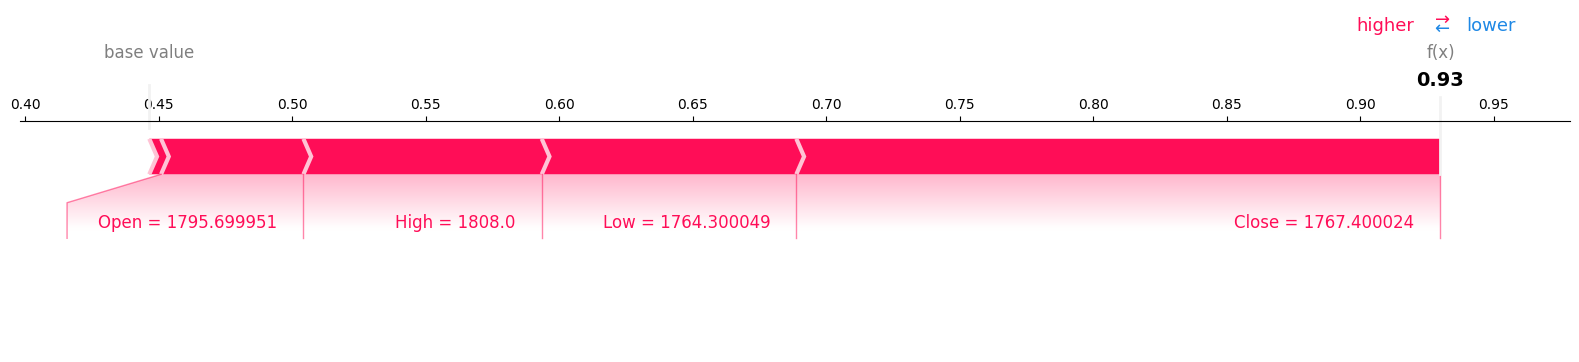

In [48]:
shap_values_sampleOne = explainer.shap_values(sampleOne_1)
shap_values_sampleOne
shap_values_sampleOne.shape

shap.plots.force(
    base_value=explainer.expected_value[0],  # Base value for Down
    shap_values=shap_values_sampleOne[..., 0],  # SHAP values for Down
    features=sampleOne_1.values[0],  # Feature values for the sample
    feature_names=X_test.columns,
    matplotlib=True
)


 99%|===================| 744/748 [00:12<00:00]       

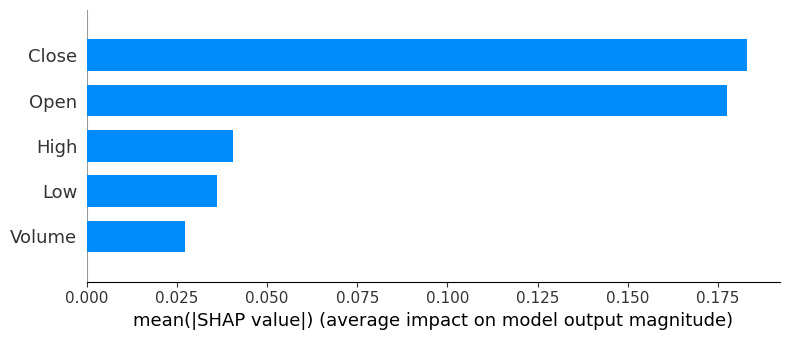

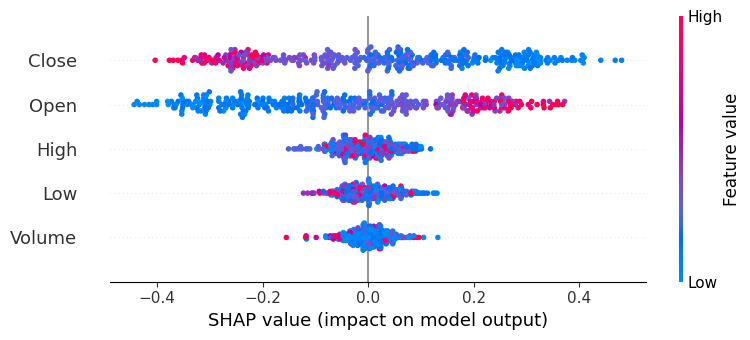

In [49]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model_1, X_train)

# Generate SHAP values
shap_values = explainer(X_test, check_additivity=False)

# Extract SHAP values for the "Down" class (class 0)
shap_values_Down = shap_values[..., 0]

# Visualize SHAP summary plot (bar)
shap.summary_plot(shap_values_Down, X_test, plot_type="bar")

# Visualize SHAP summary plot (beeswarm)
shap.summary_plot(shap_values_Down, X_test)

### **SampleTwo_1**

In [50]:

shap_values_sampleTwo = explainer.shap_values(sampleTwo_1)
shap_values_sampleTwo

array([[[-0.02500333,  0.02500333],
        [-0.06673667,  0.06673667],
        [-0.03567   ,  0.03567   ],
        [-0.01926167,  0.01926167],
        [-0.11842833,  0.11842833]]])

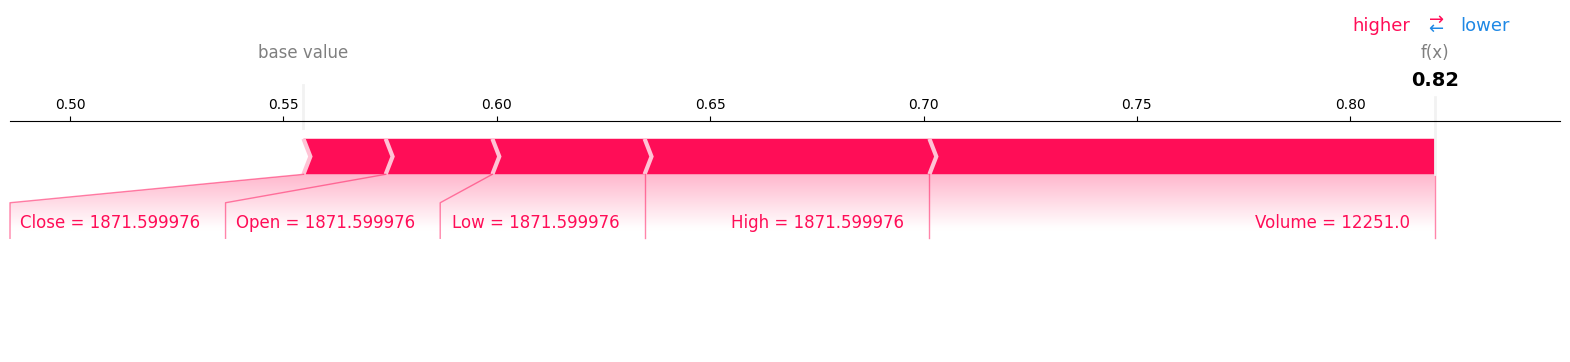

In [51]:
# Generate SHAP values for Sample Two
shap_values_sampleTwo = explainer.shap_values(sampleTwo_1)
shap_values_sampleTwo

# Visualize SHAP force plot for Sample Two
shap.plots.force(
    base_value=explainer.expected_value[1],  # Base value for Up
    shap_values=shap_values_sampleTwo[..., 1],  # SHAP values for Up
    features=sampleTwo_1.values[0],  # Feature values for the sample
    feature_names=X_test.columns,
    matplotlib=True
)


 96%|=================== | 715/748 [00:12<00:00]       

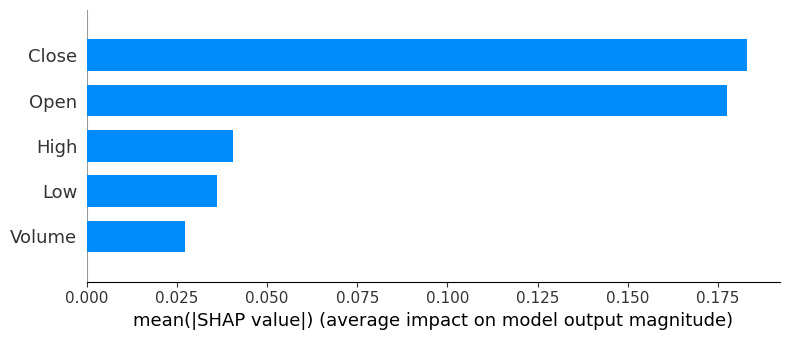

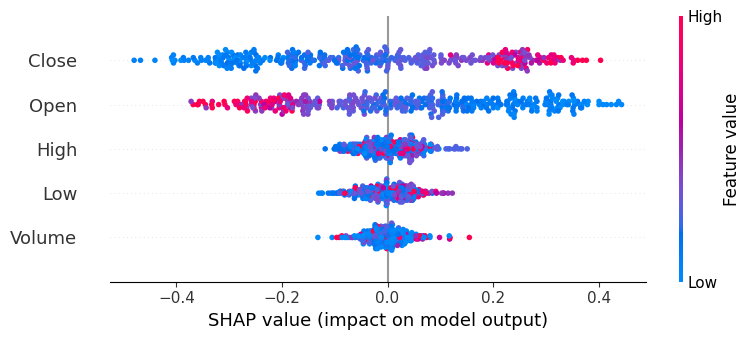

In [52]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model_1, X_train)

# Generate SHAP values
shap_values = explainer(X_test, check_additivity=False)

# Extract SHAP values for the "Down" class (class 0)
shap_values_Up = shap_values[..., 1]

# Visualize SHAP summary plot (bar)
shap.summary_plot(shap_values_Up, X_test, plot_type="bar")

# Visualize SHAP summary plot (beeswarm)
shap.summary_plot(shap_values_Up, X_test)

## **Lime**

In [53]:
pip install lime


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

In [55]:
# Initialize the LimeTabularExplainer
explainer = LimeTabularExplainer(
    X_train.values,  # Training data in array format
    feature_names=X_train.columns,  # Feature names for interpretation
    class_names=["Down", "Up"],  # Target class names
    mode='classification'  # Specify classification task
)


### **SampleOne_1**

In [56]:
# Generate explanations for the model's prediction on the selected sample
exp_One_1 = explainer.explain_instance(
    sampleOne_1.values[0],  # Single sample as a NumPy array
    lambda x: model_1.predict_proba(pd.DataFrame(x, columns=X_train.columns))  # Converts perturbed samples back to DataFrame
)

# Display explanation for Sample One
print("Explanation for Sample One:")
exp_One_1.show_in_notebook(show_all=True)


Explanation for Sample One:


In [57]:
# Create a DataFrame of explanations
explanation_list_One_1 = exp_One_1.as_list()
explanation_df_One_1 = pd.DataFrame(explanation_list_One_1, columns=['Feature', 'Contribution'])
explanation_df_One_1

Feature  Contribution
0           Close <= 1777.40     -0.303657
1  1779.70 < Open <= 1872.80      0.049885
2             Low <= 1770.75     -0.024493
3            Volume > 673.50     -0.014408
4  1787.35 < High <= 1878.80     -0.010660

### **SampleTwo_1**

In [58]:
# Generate explanations for the model's prediction on the selected sample
exp_Two_1 = explainer.explain_instance(
    sampleTwo_1.values[0],  # Single sample as a NumPy array
    lambda x: model_1.predict_proba(pd.DataFrame(x, columns=X_train.columns))  # Converts perturbed samples back to DataFrame
)

# Display explanation for Sample One
print("Explanation for Sample Two:")
exp_Two_1.show_in_notebook(show_all=True)


Explanation for Sample Two:


In [59]:
# Create a DataFrame of explanations
explanation_list_Two_1 = exp_One_1.as_list()
explanation_df_Two_1 = pd.DataFrame(explanation_list_Two_1, columns=['Feature', 'Contribution'])
explanation_df_Two_1

Feature  Contribution
0           Close <= 1777.40     -0.303657
1  1779.70 < Open <= 1872.80      0.049885
2             Low <= 1770.75     -0.024493
3            Volume > 673.50     -0.014408
4  1787.35 < High <= 1878.80     -0.010660

# **Decision-Tree-Classifier**

## **Model**

In [60]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Price Movement","Date"])
y = data["Price Movement"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train, y_train)

accuracy = model_2.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.67


In [62]:
sampleOne_2 = X_test.iloc[0:1]
sampleOne_2

prediction = model_2.predict(sampleOne_2)[0]

prediction_result = "Up" if prediction == 1 else "Down"
print(f"Prediction for Sample One: {prediction_result}")


Prediction for Sample One: Down


In [63]:
sampleTwo_2 = X_test.iloc[10:11]
sampleTwo_2

prediction = model_2.predict(sampleTwo_2)[0]

prediction_result = "Up" if prediction == 1 else "Down"
print(f"Prediction for Sample Two: {prediction_result}")


Prediction for Sample Two: Up


## **Shap**

In [64]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model_2)


### **SampleOne_2**

In [65]:

shap_values_sampleOne = explainer.shap_values(sampleOne_2)
shap_values_sampleOne

array([[[ 0.09374577, -0.09374577],
        [-0.0024439 ,  0.0024439 ],
        [-0.07656342,  0.07656342],
        [ 0.22710099, -0.22710099],
        [ 0.36295138, -0.36295138],
        [-0.0502558 ,  0.0502558 ]]])

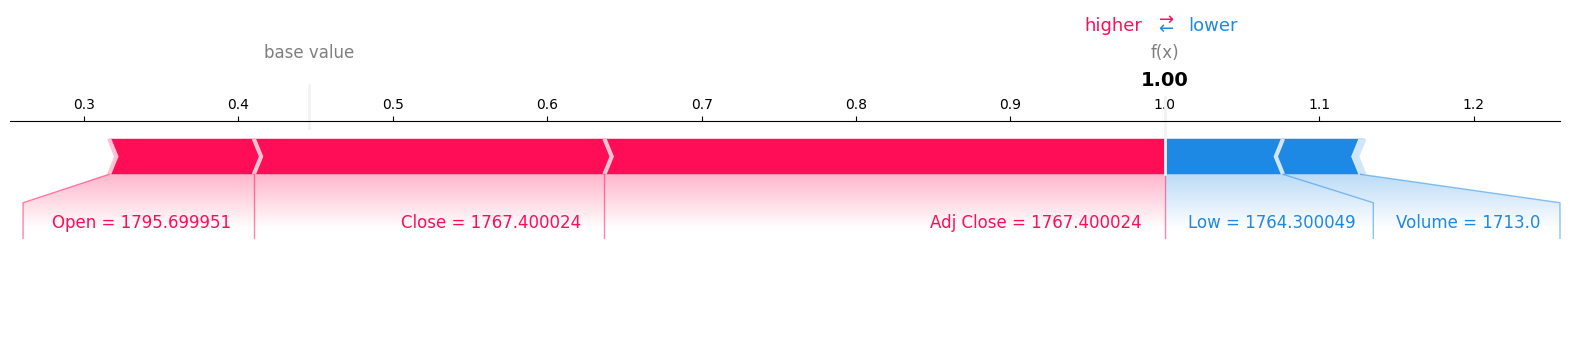

In [66]:
shap_values_sampleOne = explainer.shap_values(sampleOne_2)
shap_values_sampleOne
shap_values_sampleOne.shape

shap.plots.force(
    base_value=explainer.expected_value[0],  # Base value for Down
    shap_values=shap_values_sampleOne[..., 0],  # SHAP values for Down
    features=sampleOne_2.values[0],  # Feature values for the sample
    feature_names=X_test.columns,
    matplotlib=True
)


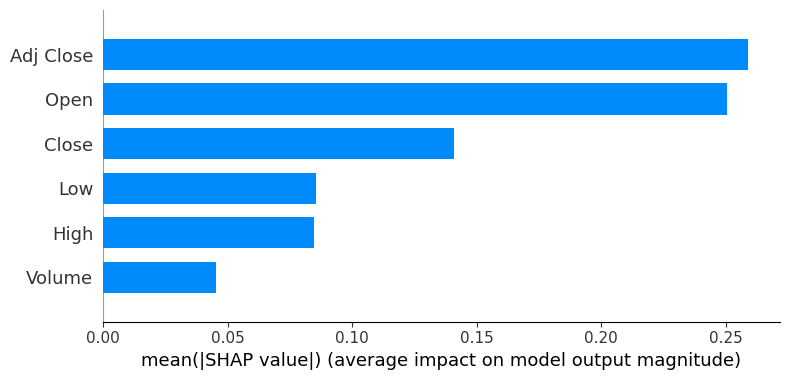

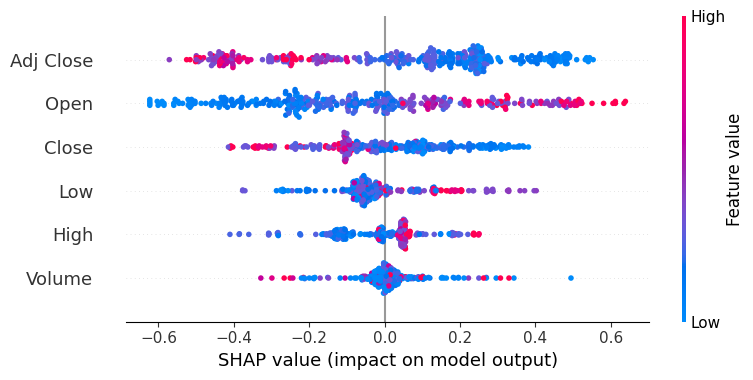

In [67]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model_2, X_train)

# Generate SHAP values
shap_values = explainer(X_test, check_additivity=False)

# Extract SHAP values for the "Down" class (class 0)
shap_values_Down = shap_values[..., 0]

# Visualize SHAP summary plot (bar)
shap.summary_plot(shap_values_Down, X_test, plot_type="bar")

# Visualize SHAP summary plot (beeswarm)
shap.summary_plot(shap_values_Down, X_test)

### **SampleTwo_2**

In [68]:

# Generate SHAP values
shap_values_sampleTwo = explainer.shap_values(sampleTwo_2)
shap_values_sampleTwo

array([[[-0.14533333,  0.14533333],
        [-0.1115    ,  0.1115    ],
        [-0.0475    ,  0.0475    ],
        [-0.02149999,  0.02150001],
        [ 0.13633333, -0.13633333],
        [-0.25050001,  0.25050001]]])

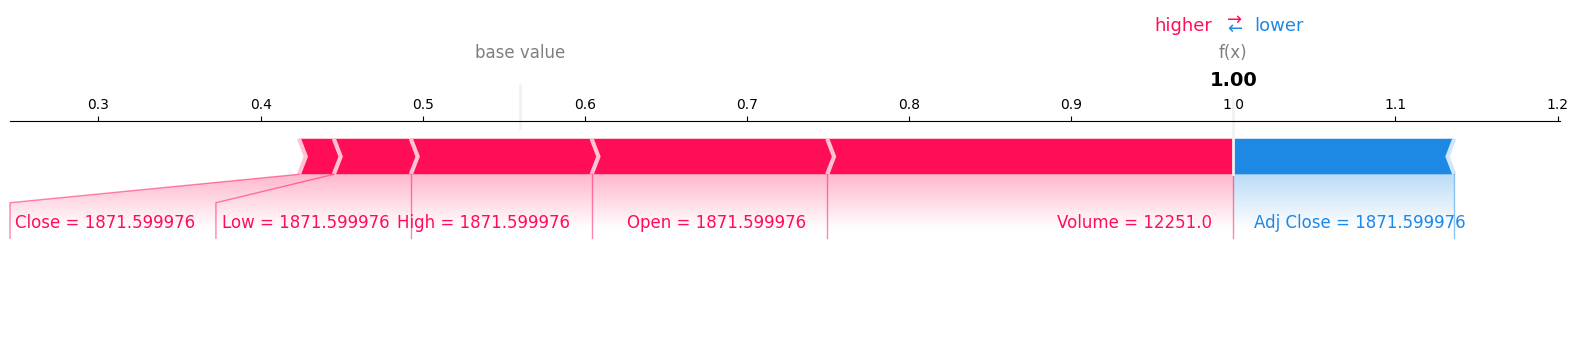

In [69]:
shap_values_sampleTwo = explainer.shap_values(sampleTwo_2)
shap_values_sampleTwo

shap.plots.force(
    base_value=explainer.expected_value[1],  # Base value for Up
    shap_values=shap_values_sampleTwo[..., 1],  # SHAP values for Up
    features=sampleTwo_2.values[0],  # Feature values for the sample
    feature_names=X_test.columns,
    matplotlib=True
)


 97%|=================== | 723/748 [00:15<00:00]       

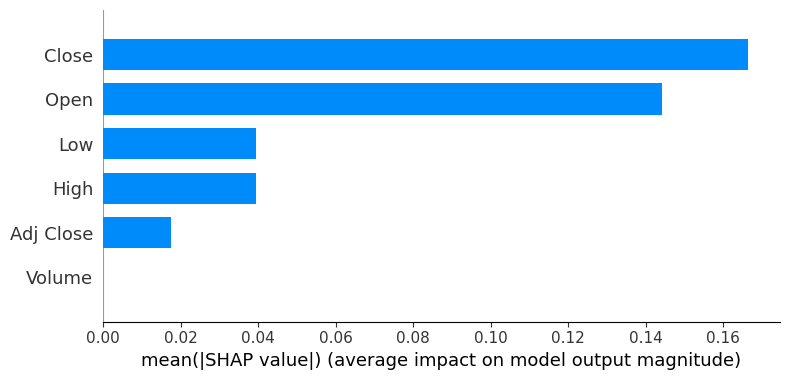

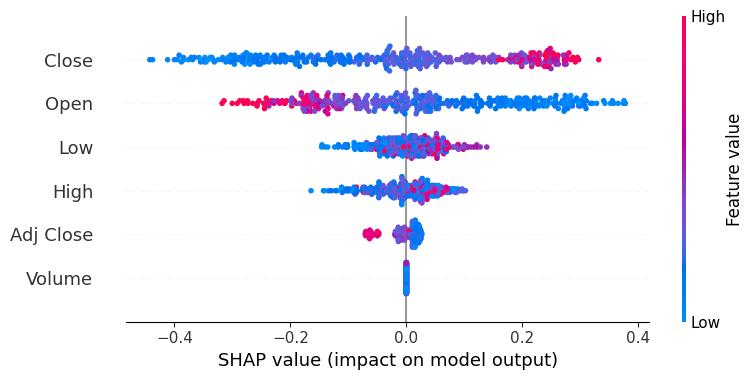

In [70]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model_1, X_train)

# Generate SHAP values
shap_values = explainer(X_test, check_additivity=False)

# Extract SHAP values for the "Down" class (class 0)
shap_values_Up = shap_values[..., 1]

# Visualize SHAP summary plot (bar)
shap.summary_plot(shap_values_Up, X_test, plot_type="bar")

# Visualize SHAP summary plot (beeswarm)
shap.summary_plot(shap_values_Up, X_test)

## **Lime**

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer



In [72]:
explainer = LimeTabularExplainer(
    X_train.values,  # Training data in array format
    feature_names=X_train.columns,  # Feature names for interpretation
    class_names=["Down", "Up"],  # Target class names
    mode='classification'  # Specify classification task
)


### **SampleOne_2**

In [73]:
exp_One_2 = explainer.explain_instance(
    sampleOne_2.values[0],  
    lambda x: model_2.predict_proba(pd.DataFrame(x, columns=X_train.columns))  # Converts perturbed samples back to DataFrame
)

print("Explanation for Sample One:")
exp_One_2.show_in_notebook(show_all=True)


Explanation for Sample One:


In [74]:
explanation_list_One_2 = exp_One_2.as_list()
explanation_df_One_2 = pd.DataFrame(explanation_list_One_2, columns=['Feature', 'Contribution'])
explanation_df_One_2

Feature  Contribution
0       Adj Close <= 1777.40     -0.290874
1  1779.70 < Open <= 1872.80      0.257921
2           Close <= 1777.40     -0.153675
3            Volume > 673.50     -0.047143
4  1787.35 < High <= 1878.80      0.028566
5             Low <= 1770.75      0.011169

### **SampleTwo_2**

In [75]:
exp_Two_2 = explainer.explain_instance(
    sampleTwo_2.values[0],  
    lambda x: model_2.predict_proba(pd.DataFrame(x, columns=X_train.columns))  # Converts perturbed samples back to DataFrame
)

print("Explanation for Sample Two:")
exp_Two_2.show_in_notebook(show_all=True)


Explanation for Sample Two:


In [76]:
explanation_list_Two_2 = exp_Two_2.as_list()
explanation_df_Two_2 = pd.DataFrame(explanation_list_Two_2, columns=['Feature', 'Contribution'])
explanation_df_Two_2

Feature  Contribution
0  1777.40 < Adj Close <= 1871.60     -0.256311
1       1779.70 < Open <= 1872.80      0.227806
2      1777.40 < Close <= 1871.60     -0.132369
3       1787.35 < High <= 1878.80      0.036244
4                 Volume > 673.50     -0.036155
5        1867.00 < Low <= 1980.40      0.024857